<a href="https://colab.research.google.com/github/DaviCMaciel/LIT/blob/main/LIT_ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa 5:


1.   Ler artigo alexnet
2.   Fazer exemplo no keras.tensorflow
3. Dataset mninst

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time

print(tf.__version__)

2.17.1


In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Número de dados de treinamentos:", len(train_images))
print("Número de dados de teste:", len(test_images))

Número de dados de treinamentos: 60000
Número de dados de teste: 10000


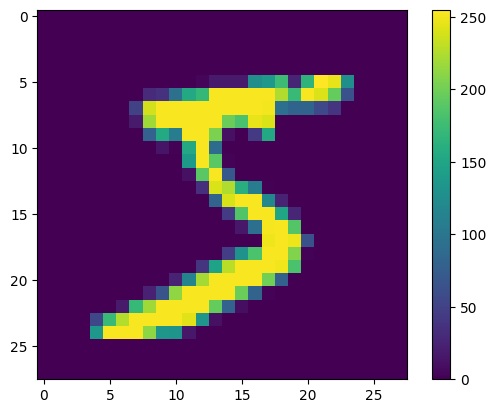

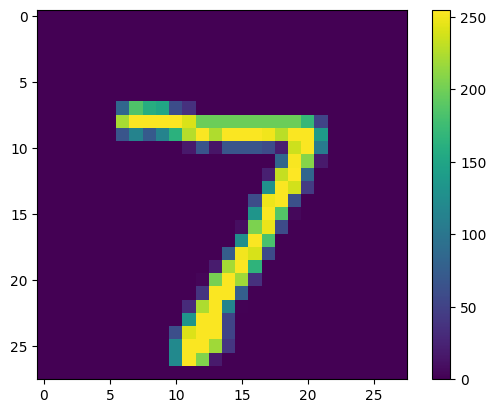

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

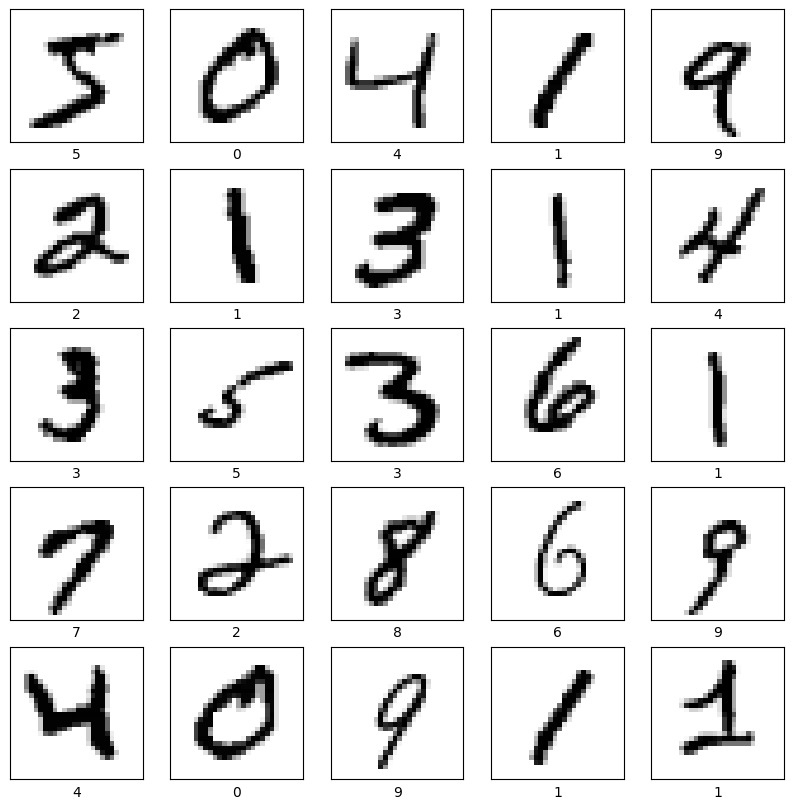

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner

AlexNet = keras.models.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(filters=16, kernel_size=(11,11), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
AlexNet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
AlexNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │           1,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 32)            │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 32)            │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          73,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,5

 Total params: 169,066 (660.41 KB)

 Trainable params: 168,778 (659.29 KB)

 Non-trainable params: 288 (1.12 KB)

In [ ]:
AlexNet.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 192s 99ms/step - accuracy: 0.7955 - loss: 0.6618 - val_accuracy: 0.9782 - val_loss: 0.0731
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 98ms/step - accuracy: 0.9660 - loss: 0.1220 - val_accuracy: 0.9813 - val_loss: 0.0588
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 98ms/step - accuracy: 0.9760 - loss: 0.0883 - val_accuracy: 0.9722 - val_loss: 0.0936
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 98ms/step - accuracy: 0.9781 - loss: 0.0789 - val_accuracy: 0.9823 - val_loss: 0.0594
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 106ms/step - accuracy: 0.9815 - loss: 0.0669 - val_accuracy: 0.9836 - val_loss: 0.0580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 107ms/step - accuracy: 0.9834 - loss: 0.0606 - val_accuracy: 0.9594 - val_loss: 0.1447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 106ms/step - accuracy: 0.9865 - loss: 0.0505 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 107ms/step - accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step


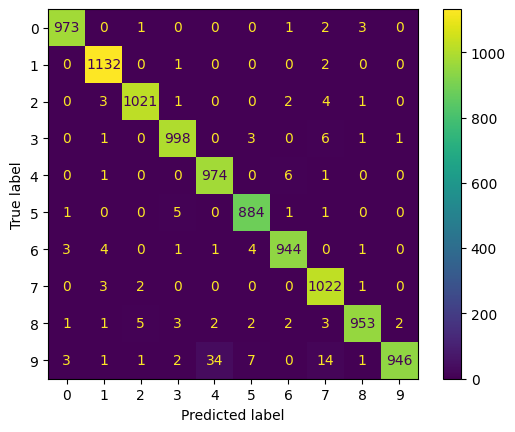

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_prediction = AlexNet.predict(test_images)
y_prediction = np.argmax (y_prediction,axis=1)
cm = confusion_matrix(test_labels, y_prediction)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
def criarAlexNet(filtros, deep_size):
  AlexNet = keras.models.Sequential([
    keras.layers.Input((28, 28, 1)),
    keras.layers.Conv2D(filters=filtros[0], kernel_size=(11,11), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=filtros[1], kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=filtros[2], kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=filtros[3], kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=filtros[4], kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(deep_size,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(deep_size,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')
    ])
  return AlexNet

In [ ]:
acuracias = []
for i in range(10):
  AlexNet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
    )
  print(f" {i + 1}/{10}")
  AlexNet.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
  acuracias.append(AlexNet.evaluate(test_images, test_labels)[1])

 1/10
Epoch 1/5
  39/1875 ━━━━━━━━━━━━━━━━━━━━ 2:57 96ms/step - accuracy: 0.1958 - loss: 2.8461

KeyboardInterrupt: 

In [ ]:
media = np.mean(acuracias)
desvio = np.std(acuracias)
print("Média das Acurácias: ", media)
print("Desvio padrão: ", desvio)

Média das Acurácias:  0.848199999332428
Desvio padrão:  0.21431706339653983


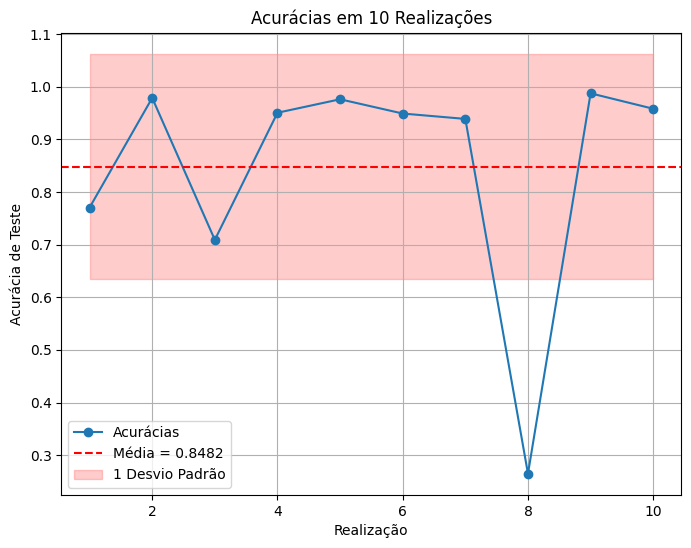

In [ ]:
# Gráfico de acurácias
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10 + 1), acuracias, marker='o', label='Acurácias')
plt.axhline(media, color='red', linestyle='--', label=f'Média = {media:.4f}')
plt.fill_between(range(1, 10 + 1),
                 media - desvio,
                 media + desvio,
                 color='red', alpha=0.2, label='1 Desvio Padrão')
plt.xlabel("Realização")
plt.ylabel("Acurácia de Teste")
plt.title("Acurácias em 10 Realizações")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
accs = []
batch_sizes = [32, 64, 128, 256]
for batch in batch_sizes:
  AlexNet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
    )
  print("Treinando com batch de tamanho:",batch)
  AlexNet.fit(train_images, train_labels, batch_size=batch, epochs=5, validation_data=(test_images, test_labels))
  accs.append(AlexNet.evaluate(test_images, test_labels)[1])

Treinando com batch de tamanho: 32
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 106ms/step - accuracy: 0.8881 - loss: 0.3673 - val_accuracy: 0.9702 - val_loss: 0.0914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 104ms/step - accuracy: 0.9730 - loss: 0.0952 - val_accuracy: 0.9824 - val_loss: 0.0559
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 104ms/step - accuracy: 0.9789 - loss: 0.0770 - val_accuracy: 0.9825 - val_loss: 0.0612
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 104ms/step - accuracy: 0.9830 - loss: 0.0621 - val_accuracy: 0.9867 - val_loss: 0.0450
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 104ms/step - accuracy: 0.9847 - loss: 0.0579 - val_accuracy: 0.9890 - val_loss: 0.0392
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9863 - loss: 0.0479
Treinando com batch de tamanho: 64
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 190s 197ms/step - accuracy: 0.9888 - loss: 0.0448 - val_accuracy: 0.9902 - val_loss: 0.0414
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 198ms/step - 

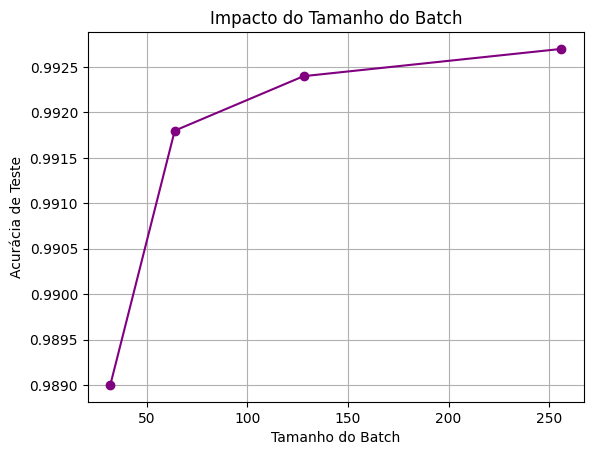

In [ ]:
# Gráfico
plt.plot(batch_sizes, accs, marker='o', color='purple')
plt.xlabel('Tamanho do Batch')
plt.ylabel('Acurácia de Teste')
plt.title('Impacto do Tamanho do Batch')
plt.grid()
plt.show()

In [ ]:
filtros = [(32, 64, 64, 64, 64), (16, 32, 32, 32, 32), (8, 16, 16, 16, 16)]
deep_size = 256
resultados = {}

In [ ]:
for filter in filtros:
  AlexNet = criarAlexNet(filter, deep_size)
  AlexNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  AlexNet.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
  resultados[(filter, deep_size)] = AlexNet.evaluate(test_images, test_labels)[1]

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 182ms/step - accuracy: 0.8171 - loss: 0.6009 - val_accuracy: 0.9772 - val_loss: 0.0773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 372s 176ms/step - accuracy: 0.9679 - loss: 0.1216 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 377s 174ms/step - accuracy: 0.9781 - loss: 0.0833 - val_accuracy: 0.9850 - val_loss: 0.0525
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 318s 170ms/step - accuracy: 0.9800 - loss: 0.0798 - val_accuracy: 0.9866 - val_loss: 0.0478
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 329s 174ms/step - accuracy: 0.9822 - loss: 0.0690 - val_accuracy: 0.9825 - val_loss: 0.0624
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9787 - loss: 0.0738
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 234s 106ms/step - accuracy: 0.7994 - loss: 0.6452 - val_accuracy: 0.9564 - val_loss: 0.1358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 202s 106ms/step - accuracy: 0.9670 - loss: 0.1166 - val_accuracy: 0.9694 - val_loss:

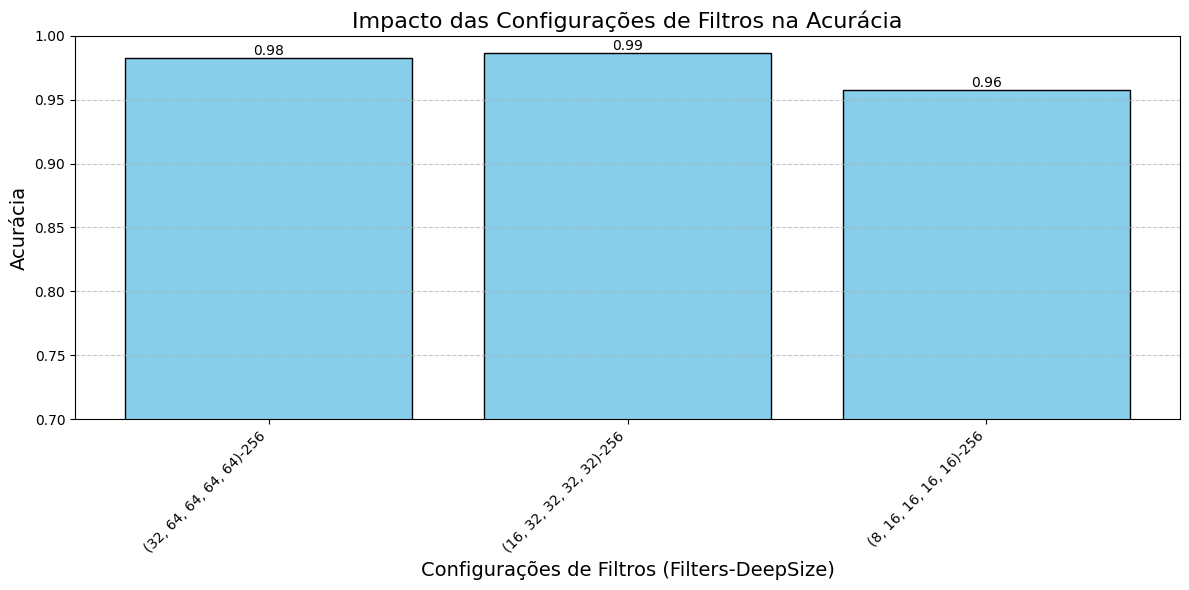

In [ ]:
# Obter valores únicos de filtros e deep_sizes
filtros = sorted(list(set(key[0] for key in resultados.keys())))
deep_sizes = sorted(list(set(key[1] for key in resultados.keys())))

# Configurações para o gráfico
x_labels = [f"{filtros}-{deep_size}" for filtros, deep_size in resultados.keys()]
accuracies = [resultados[(f, d)] for f, d in resultados.keys()]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0.7, 1.00)

# Adicionar rótulos e título
plt.xlabel("Configurações de Filtros (Filters-DeepSize)", fontsize=14)
plt.ylabel("Acurácia", fontsize=14)
plt.title("Impacto das Configurações de Filtros na Acurácia", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adicionar valores no topo de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
resultados

{((32, 64, 64, 64, 64), 256): 0.9825000166893005,
 ((16, 32, 32, 32, 32), 256): 0.9868999719619751,
 ((8, 16, 16, 16, 16), 256): 0.9573000073432922}